<b>NNPerceptronModel:</b>
    
<img src="./NNPerceptronModel.png" align="left" height="500" width="500">

<br/><br/><br/><br/><br/><br/><br/><br/>
<b>Goal of the notebook:</b>


<b>+</b> 1) Create a dataset with random scattered dots and label them with defined rules. <br/>
<b>+</b> 2) Draw a separate line for this rule <br/>
<b>+</b> 3) Train the NN to recognize label of test dots by coordinates <br/>
<b>+</b> 4) Vizualize training process in real time. <br/>
<b>+</b> 5) Include biases and draw separate line in different forms. <br/>
6) Draw the perseptron line.

In [1]:
%matplotlib notebook

# Import libs
import matplotlib
import matplotlib.axes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Perceptron
class PerceptronNN:
    
    def __init__(self, NumberOfInputs):
        
        # NumberOfInputs + bias
        self.weights = np.random.randn(1,NumberOfInputs+1)
        
    def FeedForward(self, Dot):
        return ActivationFunction(Dot.inputs @ self.weights.T)
    
    def Train(self, Dot):
        
        guess = self.FeedForward(Dot)
        error = Dot.label - guess
        self.weights += error * Dot.inputs * 0.1
        
    def GetWeights(self):
        return self.weights

In [3]:
# Miscellaneous functions

def ActivationFunction(sum):
    return 0 if sum < 0.5 else 1

# y = mx + b
def y(x):
    return 0.6*x + 0.12

In [4]:
# Single point class
class Point:
    
    def __init__(self, NumberOfInputs):
        
        self.inputs = np.random.rand(NumberOfInputs)
        self.inputs = np.append(self.inputs,1)     # Add bias
        self.label = 0 if y(self.inputs[0]) <= self.inputs[1] else 1

In [18]:
# Draw the line based on the current weights
# Formula is weights[0]*x + weights[1]*y + weights[2] = 0
# Not work!!!
def DrawAdjustedLine(axe, Perceptronn):
    
    def GuessY(x):
        # y = (-(b / w2) / (b / w1))x + (-b / w2)
        weights = Perceptronn.GetWeights().reshape(3,)
        print('weights = ', weights)
        print('x = ', x)
        # return -(weights[0]/weights[1])-(weights[2]/weights[1]) * x
        
        y = (-(weights[2] / weights[1]) / (weights[2] / weights[0]))*x + (-weights[2] / weights[1])
        print('y = ', y)
        breakpoint()
        return y
    
    axe.plot(0.1,GuessY(0.1), 'bX')
    fig.canvas.draw()


# Will draw points with actual labels marked as black and white ineer color,
# then will assign green or red edge color based on prediction of perceptron.
# If predicted label fit actual label - dot will have green edge color, otherwise red.
def DrawAxes(Axes, TrainList, Perceptronn, TestList=None):
    
    # Take out common code into separate function.
    def DrawADot(axe, point):
        axe.plot(point.inputs[0], point.inputs[1],
                    'ok',
                    markeredgewidth = 2,
                    markersize = 12,
                    markerfacecolor = 'w' if point.label == 0 else 'k',
                    markeredgecolor = 'g' if Perceptronn.FeedForward(point) == point.label else 'r')
        
    def DrawSeparateLine(axe):
        axe.plot((0,1),(y(0),y(1)), 'k')
    
    for point in TrainList:
        DrawADot(Axes[0], point)
    DrawSeparateLine(Axes[0])
    
    
    # If testing data provided - plot it into second axe.
    if TestList:
        for point in TestList:
            DrawADot(Axes[1], point)
        DrawSeparateLine(Axes[1])
    
    # Draw figure with updated data.
    fig.canvas.draw()

<IPython.core.display.Javascript object>


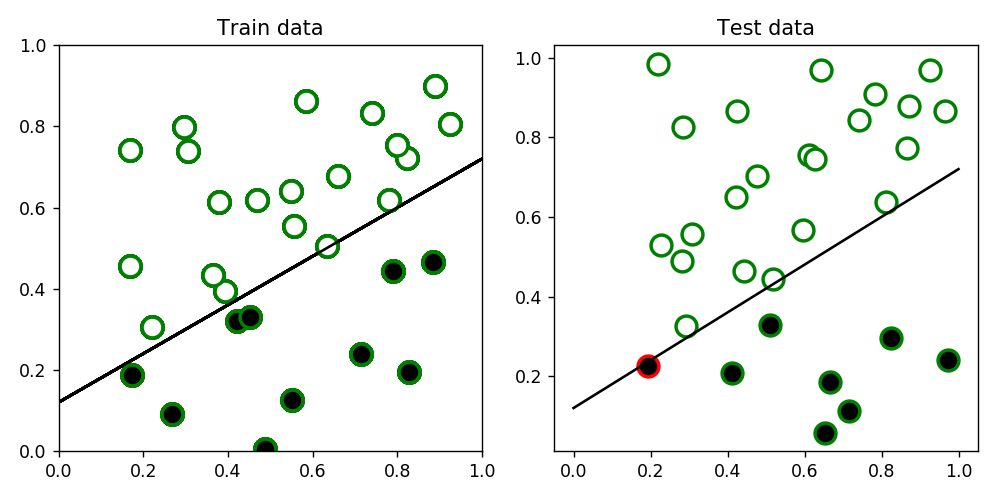

In [19]:
# Main
# Crate lists of dots
TrainList = [Point(2) for i in range(30)]
TestList = [Point(2) for i in range(30)]

Perceptron = PerceptronNN(2)

# Create axes outside the draw function.
fig, axes = plt.subplots(1,2, figsize=(8,4), tight_layout=True)#, subplot_kw=dict(yticks=(), xticks=()))
axes[0].autoscale(False)
axes[0].set_title('Train data')
axes[1].set_title('Test data')

# Training
for epoch in range(20):
    for dot in TrainList:
        Perceptron.Train(dot)
    DrawAxes(axes, TrainList, Perceptron)
    # DrawAdjustedLine(axes[0], Perceptron) # Not work        

DrawAxes(axes, TrainList, Perceptron, TestList)